In [435]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
%matplotlib inline

# Загрузка даних / Load data 

In [586]:
path_data='D:/kaggle-competetions/Tabular-Sep-2021/data'
test_df = pd.read_csv(path_data+'/test.csv')
train_df = pd.read_csv(path_data+'/train.csv')


FEATURES = list(train_df.columns[1:-1])
#id shoudn't used 
TARGET = train_df.columns[-1]
count_train = train_df.shape[0]
print(f'FEATURES = {FEATURES}')
print(f'TARGET = {TARGET}')
print(f'Count values in df =  {count_train}')

FEATURES = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87', 'f88', 'f89', 'f90', 'f91', 'f92', 'f93', 'f94', 'f95', 'f96', 'f97', 'f98', 'f99', 'f100', 'f101', 'f102', 'f103', 'f104', 'f105', 'f106', 'f107', 'f108', 'f109', 'f110', 'f111', 'f112', 'f113', 'f114', 'f115', 'f116', 'f117', 'f118']
TARGET = claim
Count values in df =  957919


In [588]:
FEATURES[0]

'f1'

In [434]:
train_df.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f110,f111,f112,f113,f114,f115,f116,f117,f118,claim
0,0,0.10859,0.004314,-37.566,0.017364,0.28915,-10.25100,135.12,168900.0,3.992400e+14,...,-12.2280,1.7482,1.90960,-7.11570,4378.80,1.2096,8.613400e+14,140.1,1.01770,1
1,1,0.10090,0.299610,11822.000,0.276500,0.45970,-0.83733,1721.90,119810.0,3.874100e+15,...,-56.7580,4.1684,0.34808,4.14200,913.23,1.2464,7.575100e+15,1861.0,0.28359,0
2,2,0.17803,-0.006980,907.270,0.272140,0.45948,0.17327,2298.00,360650.0,1.224500e+13,...,-5.7688,1.2042,0.26290,8.13120,45119.00,1.1764,3.218100e+14,3838.2,0.40690,1
3,3,0.15236,0.007259,780.100,0.025179,0.51947,7.49140,112.51,259490.0,7.781400e+13,...,-34.8580,2.0694,0.79631,-16.33600,4952.40,1.1784,4.533000e+12,4889.1,0.51486,1
4,4,0.11623,0.502900,-109.150,0.297910,0.34490,-0.40932,2538.90,65332.0,1.907200e+15,...,-13.6410,1.5298,1.14640,-0.43124,3856.50,1.4830,-8.991300e+12,NaN,0.23049,1


In [603]:
train_df[FEATURES].describe().T

,count,mean,std,min,25%,50%,75%,max
f1,942672.0,9.020086e-02,4.356374e-02,-1.499100e-01,7.022700e-02,9.013500e-02,1.165000e-01,4.151700e-01
f2,942729.0,3.459637e-01,1.462507e-01,-1.904400e-02,2.830500e-01,3.891000e-01,4.584500e-01,5.189900e-01
f3,942428.0,4.068744e+03,6.415829e+03,-9.421700e+03,4.184300e+02,1.279500e+03,4.444400e+03,3.954400e+04
f4,942359.0,2.012140e-01,2.125103e-01,-8.212200e-02,3.508650e-02,1.370000e-01,2.971000e-01,1.319900e+00
f5,942514.0,3.048693e-01,1.453425e-01,-6.989800e-03,2.405200e-01,3.277900e-01,4.128300e-01,5.547500e-01
...,...,...,...,...,...,...,...,...
f114,942481.0,6.315297e+04,9.243502e+04,-8.197700e+04,2.443200e+03,1.947900e+04,8.848800e+04,5.260500e+05
f115,942360.0,1.208876e+00,1.149588e-01,9.052700e-01,1.146800e+00,1.177200e+00,1.242000e+00,1.886700e+00
f116,942330.0,4.276905e+16,6.732441e+16,-8.944400e+15,2.321100e+14,1.327500e+16,5.278700e+16,3.249900e+17
f117,942512.0,3.959205e+03,3.155992e+03,-4.152400e+02,1.306200e+03,3.228000e+03,6.137900e+03,1.315100e+04


In [489]:
train_df[FEATURES].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957919 entries, 0 to 957918
Columns: 118 entries, f1 to f118
dtypes: float64(118)
memory usage: 862.4 MB


# Графіки для розуміння розподілу даних. Plots for understanding data distribution

In [617]:
bins = 50
plts_grid = 5 

Train & test data


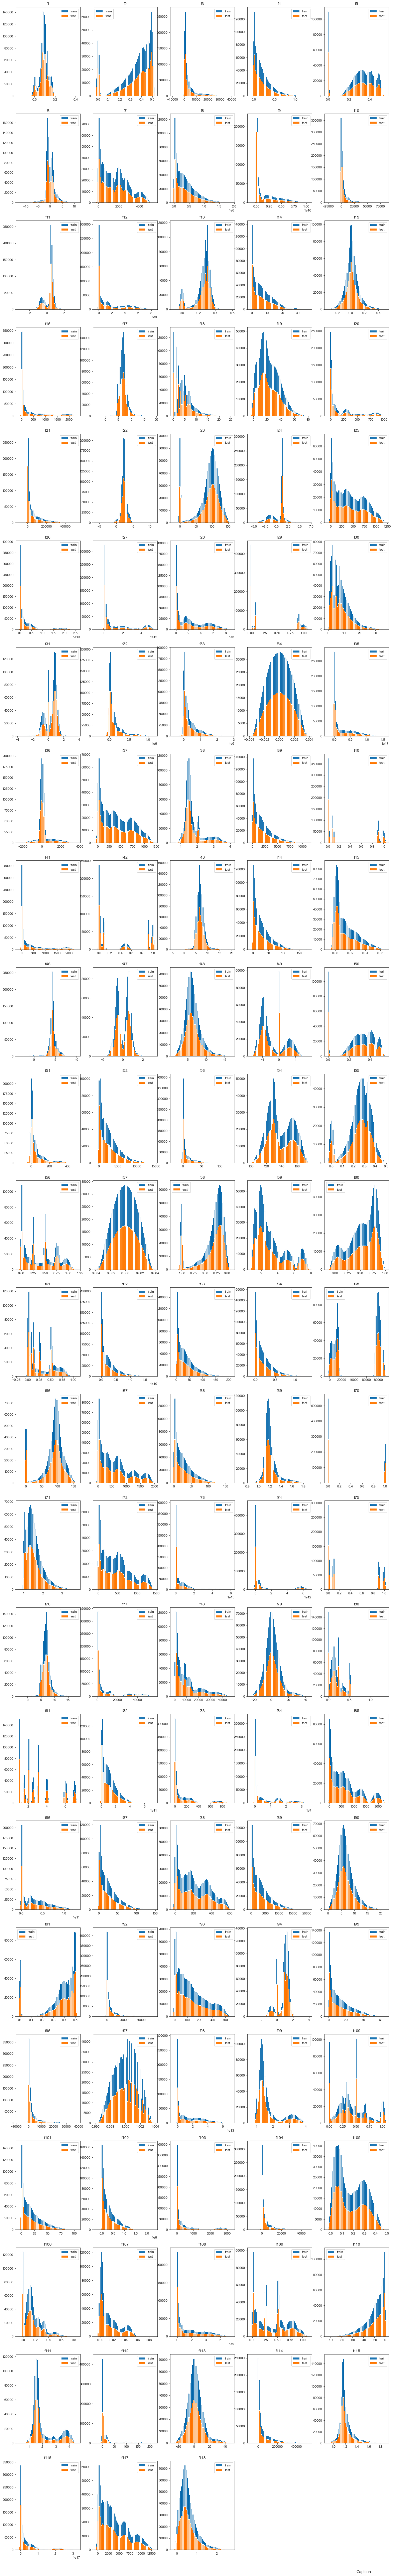

In [620]:
print('Train & test data')
bins = 50
fig = plt.figure(figsize = (20, 140))
for idx, i in enumerate(FEATURES):
    ax = fig.add_subplot(int(np.ceil(len(FEATURES)/plts_grid)), plts_grid, idx+1)
    plt.hist(train_df[i], bins= bins , label='train')
    plt.hist(test_df[i], bins = bins, label='test')
    ax.set_title(i)
    plt.legend()

plt.text(9, -20000, 'Capition', size = 12)
plt.show()

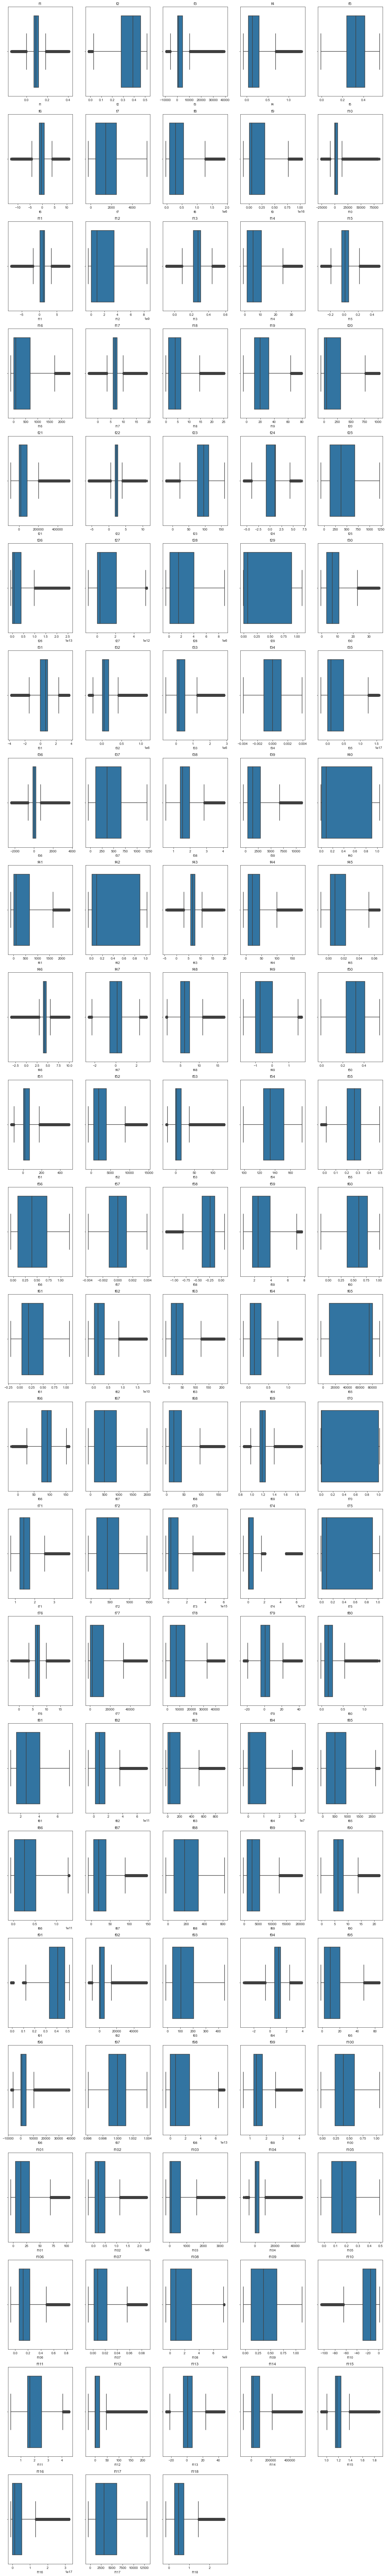

In [636]:
fig = plt.figure(figsize = (20, 140))
for idx, i in enumerate(FEATURES):    
    fig.add_subplot(int(np.ceil(len(FEATURES)/plts_grid)), plts_grid, idx+1)
    ax  = sns.boxplot(x = train_df[i] )
    ax.set_title(i)   
plt.show()

# Перевірка на відсутні значення / Missing values checking

##  Графіки про кількість і роподіл відсутніх значень / plots about missing values

957919


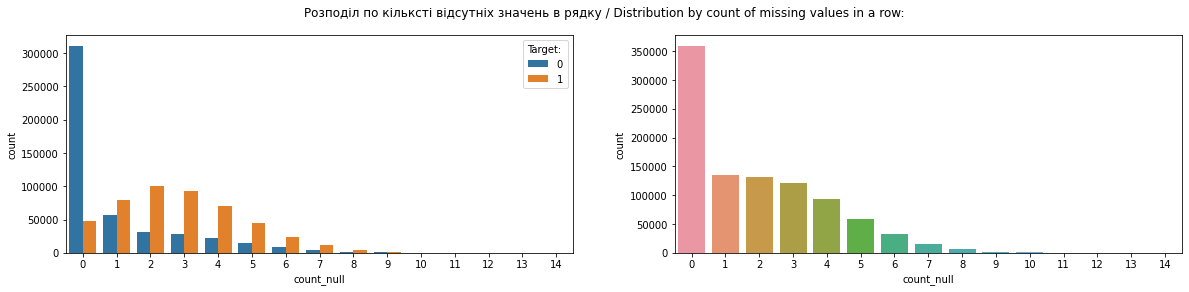

In [563]:
train_df['count_null'] = train_df.isna().sum(axis=1)
print(train_df.shape[0])
fig, (ax1, ax2) = plt.subplots(1, 2)

sns.countplot(x='count_null', hue = TARGET, data=train_df, ax =ax1 )  
sns.countplot(x='count_null', data=train_df, ax =ax2) 

ax1.legend(title='Target: ')
fig.suptitle('Розподіл по кільксті відсутніх значень в рядку / Distribution by count of missing values ​​in a row: ')
fig.set_figwidth(20) 

plt.show()


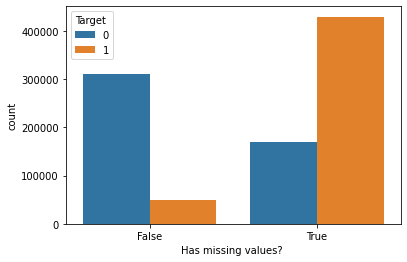

In [564]:
train_df['count_null'] = train_df.isna().sum(axis=1)
train_df['has_mis'] = train_df['count_null'] > 0 

fig, ax = plt.subplots(1)
sns.countplot(x='has_mis', hue = TARGET, data=train_df )  
ax.set_xlabel("Has missing values? ")
ax.legend( title= "Target ")
plt.show()

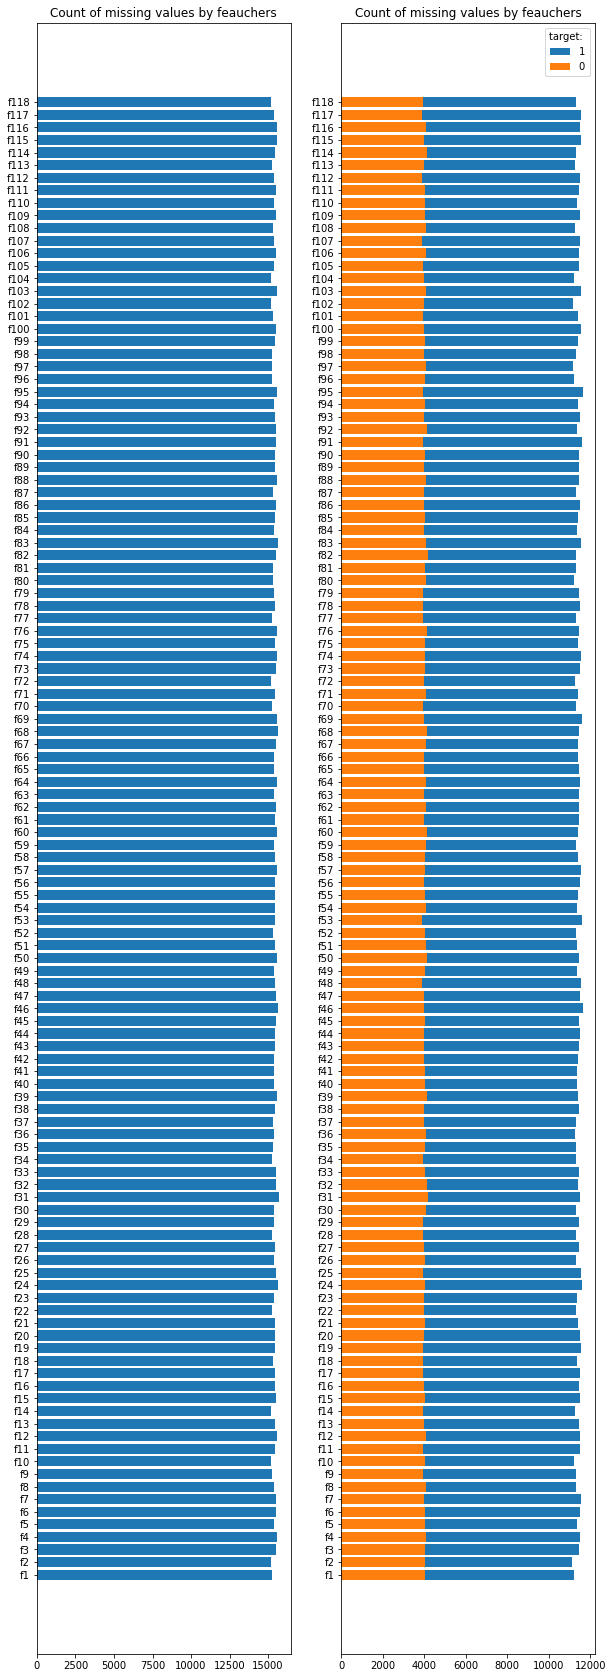

In [580]:
train_df[FEATURES].isna().sum(axis=0)  

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.barh(FEATURES,train_df[FEATURES].isna().sum(axis=0) )

ax1.set_title('Count of missing values by feauchers')

ax2.barh(FEATURES, train_df[train_df['claim'] == 1].isna().sum(axis= 0 )[FEATURES], color = 'tab:blue', label = '1')
ax2.barh(FEATURES, train_df[train_df['claim'] == 0].isna().sum(axis= 0 )[FEATURES], color = 'tab:orange', label = '0' )
    
ax2.legend(title ="target: ")
ax2.set_title('Count of missing values by feauchers')


fig.set_figheight(30)
fig.set_figwidth(10)
plt.show()

# Model 

In [417]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from xgboost import XGBClassifier 
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping , ModelCheckpoint


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


In [412]:
train_df = pd.read_csv('D:/kaggle-competetions/Tabular-Sep-2021/data/train.csv')

## XGBClassifier

In [425]:
folds = 5
features = list(train_df.columns[1:119])

train_oof = np.zeros((957919,))
skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)
for fold, (train_idx, valid_idx) in enumerate(skf.split(train_df[features], train_df['claim'])):
    X_train, X_valid = train_df.iloc[train_idx], train_df.iloc[valid_idx]
    y_train = X_train['claim']
    y_valid = X_valid['claim']
    X_train = X_train.drop('claim', axis=1)
    X_valid = X_valid.drop('claim', axis=1)

    model = XGBClassifier(random_state=42, verbosity=0)

    model =  model.fit(X_train, y_train, verbose=0)
    temp_oof = model.predict_proba(X_valid)[:, 1]

    
    train_oof[valid_idx] = temp_oof
    print(f'Fold {fold} AUC: ', roc_auc_score(y_valid, temp_oof))
    
print(f'OOF AUC: ', roc_auc_score(train_df['claim'], train_oof))

C:\Users\vsydo\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fold 0 AUC:  0.7991053637577755


C:\Users\vsydo\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fold 1 AUC:  0.8005933889506501


C:\Users\vsydo\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fold 2 AUC:  0.7999221545824198


C:\Users\vsydo\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fold 3 AUC:  0.799284236551261


C:\Users\vsydo\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fold 4 AUC:  0.7990510624350742
OOF AUC:  0.799588342139394


In [428]:
print(train_oof)

[0.40152997 0.28120491 0.90404576 ... 0.19361939 0.4100889  0.83585787]


## CatBoostClassifier

In [430]:
train_oof = np.zeros((957919,))
skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)
for fold, (train_idx, valid_idx) in enumerate(skf.split(train_df[features], train_df['claim'])):
    X_train, X_valid = train_df.iloc[train_idx], train_df.iloc[valid_idx]
    y_train = X_train['claim']
    y_valid = X_valid['claim']
    X_train = X_train.drop('claim', axis=1)
    X_valid = X_valid.drop('claim', axis=1)

    model = CatBoostClassifier(random_state=42)

    model =  model.fit(X_train, y_train, verbose=0)
    temp_oof = model.predict_proba(X_valid)[:, 1]
    train_oof[valid_idx] = temp_oof
    print(f'Fold {fold} AUC: ', roc_auc_score(y_valid, temp_oof))
    
print(f'OOF AUC: ', roc_auc_score(train_df['claim'], train_oof))

Fold 0 AUC:  0.8028103424012685
Fold 1 AUC:  0.8045019946282849
Fold 2 AUC:  0.8039021049424937
Fold 3 AUC:  0.8025856267665065
Fold 4 AUC:  0.8025598425996409
OOF AUC:  0.803270329178054


## LGBMClassifier

In [ ]:
train_oof = np.zeros((957919,))
skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)
for fold, (train_idx, valid_idx) in enumerate(skf.split(train_df[features], train_df['claim'])):
    X_train, X_valid = train_df.iloc[train_idx], train_df.iloc[valid_idx]
    y_train = X_train['claim']
    y_valid = X_valid['claim']
    X_train = X_train.drop('claim', axis=1)
    X_valid = X_valid.drop('claim', axis=1)

    model = LGBMClassifier(random_state=42)

    model =  model.fit(X_train, y_train, verbose=0)
    temp_oof = model.predict_proba(X_valid)[:, 1]
    train_oof[valid_idx] = temp_oof
    print(f'Fold {fold} AUC: ', roc_auc_score(y_valid, temp_oof))
    
print(f'OOF AUC: ', roc_auc_score(train_df['claim'], train_oof))

## network 

In [421]:
# model creation
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape = (118,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid', kernel_regularizer=keras.regularizers.l1(0.01)))
model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])

#adding a checkpointer to save the model weights if the accuracy improves over validation dataset
checkpointer = [EarlyStopping(monitor = 'val_accuracy', verbose = 1, restore_best_weights=True,mode="max",patience = 9),
                ModelCheckpoint(
                    filepath='model.weights.best.hdf5',
                    monitor="val_accuracy",
                    verbose=1,
                    save_best_only=True,
                    mode="max")]
#total epochs
epochs = 80
#model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 117, 32)           96        
_________________________________________________________________
batch_normalization_2 (Batch (None, 117, 32)           128       
_________________________________________________________________
dropout_3 (Dropout)          (None, 117, 32)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 116, 64)           4160      
_________________________________________________________________
batch_normalization_3 (Batch (None, 116, 64)           256       
_________________________________________________________________
dropout_4 (Dropout)          (None, 116, 64)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7424)             

C:\Users\vsydo\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [422]:

for fold, (train_idx, valid_idx) in enumerate(skf.split(train_df[features], train_df['claim'])):
    X_train, X_valid = train_df.iloc[train_idx], train_df.iloc[valid_idx]
    y_train = X_train['claim']
    y_valid = X_valid['claim']
    X_train = X_train.drop('claim', axis=1)
    X_valid = X_valid.drop('claim', axis=1)

    history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_valid, y_valid), verbose=1, callbacks=checkpointer)
    temp_oof = model.predict_proba(X_valid)[:, 1]
    train_oof[valid_idx] = temp_oof
    print(f'Fold {fold} AUC: ', roc_auc_score(y_valid, temp_oof))
    
print(f'OOF AUC: ', roc_auc_score(train_df['claim'], train_oof))

Epoch 1/80


ValueError: in user code:

    C:\Users\vsydo\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\engine\training.py:855 train_function  *
        return step_function(self, iterator)
    C:\Users\vsydo\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\engine\training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\vsydo\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\vsydo\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\vsydo\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\vsydo\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\engine\training.py:838 run_step  **
        outputs = model.train_step(data)
    C:\Users\vsydo\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\engine\training.py:795 train_step
        y_pred = self(x, training=True)
    C:\Users\vsydo\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\vsydo\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:230 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_1 is incompatible with the layer: : expected min_ndim=3, found ndim=2. Full shape received: (None, 119)
